# Chargement d'une image et affichage de son histogramme

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

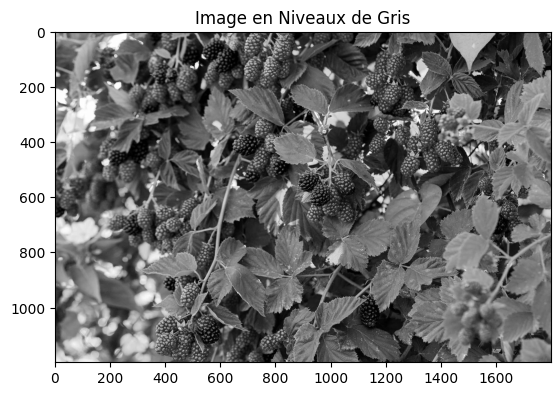

In [2]:
# Charger l’image en niveaux de gris
img = cv2 . imread (r'C:\Users\Admin\Desktop\School\S5\Computer vision\TP1\raspberry.jpg', cv2 . IMREAD_GRAYSCALE )

plt . imshow ( img , cmap ='gray')
plt . title ('Image en Niveaux de Gris')
plt . show ()

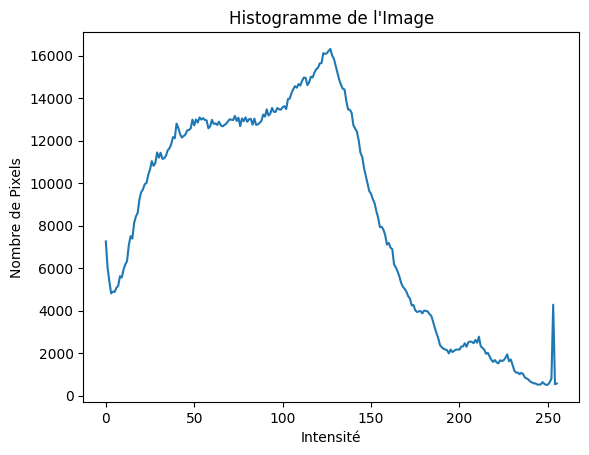

In [3]:
# Calculer et afficher l’histogramme
hist = cv2 . calcHist ([ img ] , [0] , None , [256] , [0 , 256])
plt . plot ( hist )
plt . title ('Histogramme de l\'Image')
plt . xlabel ( 'Intensité')
plt . ylabel ('Nombre de Pixels')
plt . show ()

# Interprétation de l'histogramme

### Distribution des intensités :
- L'intensité est majoritairement concentrée autour de la plage 50-150, avec un pic important vers 140, puis une baisse progressive jusqu'à environ 250.
- Il y a également des pics visibles aux extrêmes de l'intensité : un vers 0 (noir) et un autre vers 255 (blanc).
  
### Interprétation de la luminosité :
- **Principale observation** : L'image semble avoir des tons intermédiaires à clairs. La majorité des pixels se situent entre 50 et 150, ce qui correspond à des zones plutôt grisâtres à claires.
- **Sombre ou claire** : Même si l'image contient quelques zones très sombres (pic à 0) et très claires (pic à 255), la plupart des intensités sont autour de 130-150, suggérant une image équilibrée avec une tendance légèrement claire.

### Relation entre l’histogramme et la perception visuelle :
- **Zones sombres et claires** : Les deux pics visibles aux extrémités (0 et 255) indiquent la présence de zones très sombres et très claires, ce qui pourrait correspondre à des ombres profondes.
- **Tonalité générale** : La concentration des pixels dans la zone médiane à légèrement claire suggère que l'image est perçue comme ayant une majorité de tons intermédiaires, sans être trop contrastée.

# Transformation de l'image : Normalisation de l'image

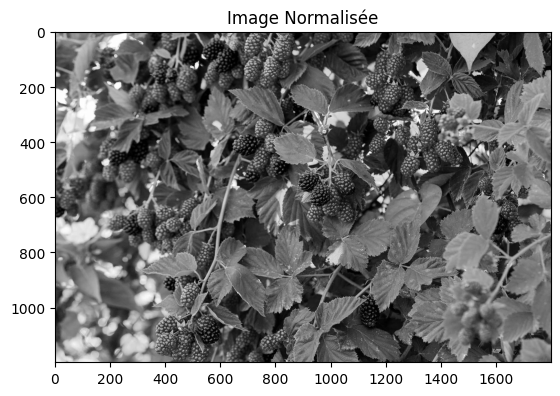

In [4]:
# Normaliser l’image pour exploiter toute la dynamique de codage
norm_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Affichage de l’image normalisée
plt.imshow(norm_img, cmap='gray')
plt.title('Image Normalisée')
plt.show()

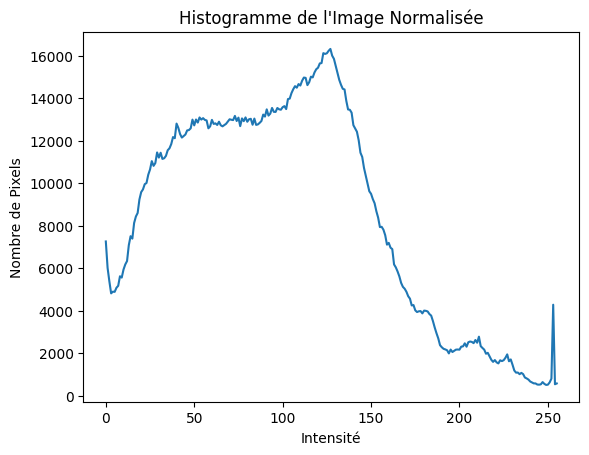

In [5]:
# Calculer et afficher l’histogramme de l’image normalisée
norm_hist = cv2.calcHist([norm_img], [0], None, [256], [0, 256])

plt.plot(norm_hist)
plt.title('Histogramme de l\'Image Normalisée')
plt.xlabel('Intensité')
plt.ylabel('Nombre de Pixels')
plt.show()

# Transformation de l'image : Egalisation d'histogramme

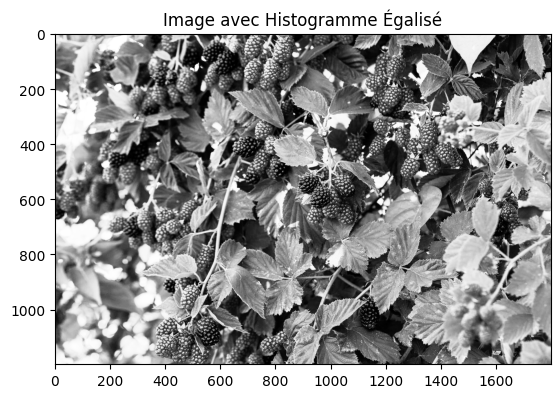

In [6]:
# Égaliser l’histogramme de l’image 
equalized_img = cv2.equalizeHist(img)

# Affichage de l’image avec histogramme égalisé
plt.imshow(equalized_img, cmap='gray')
plt.title('Image avec Histogramme Égalisé')
plt.show()

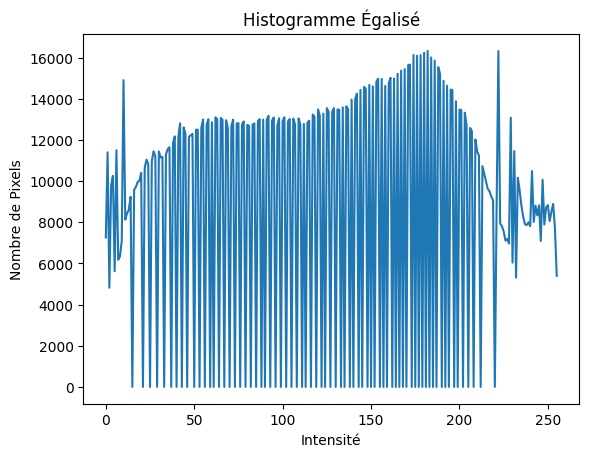

In [7]:
# Calculer et afficher l’histogramme égalisé
equalized_hist = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

plt.plot(equalized_hist)
plt.title('Histogramme Égalisé')
plt.xlabel('Intensité')
plt.ylabel('Nombre de Pixels')
plt.show()

# Comparaison entre l'original et le normalisé et égalisé

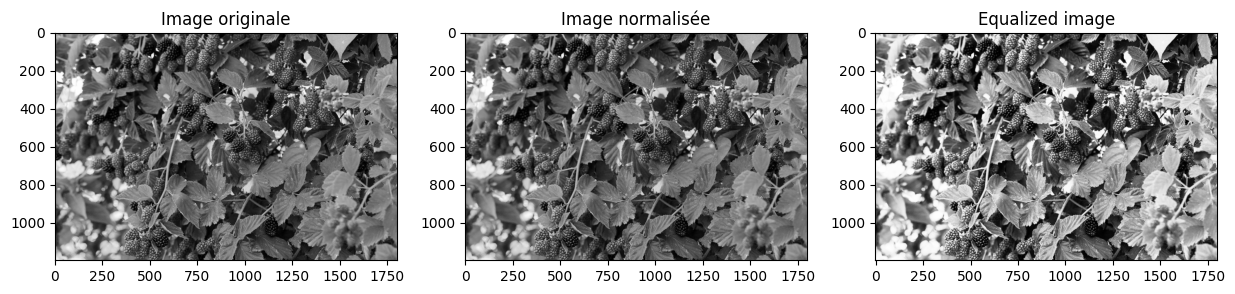

In [9]:
plt.figure(figsize=(15, 5))  

plt.subplot(1, 3, 1)  
plt.imshow(img, cmap='gray')
plt.title('Image originale')

plt.subplot(1, 3, 2)  
plt.imshow(norm_img, cmap='gray')
plt.title('Image normalisée')

plt.subplot(1, 3, 3)  
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized image')

plt.show()

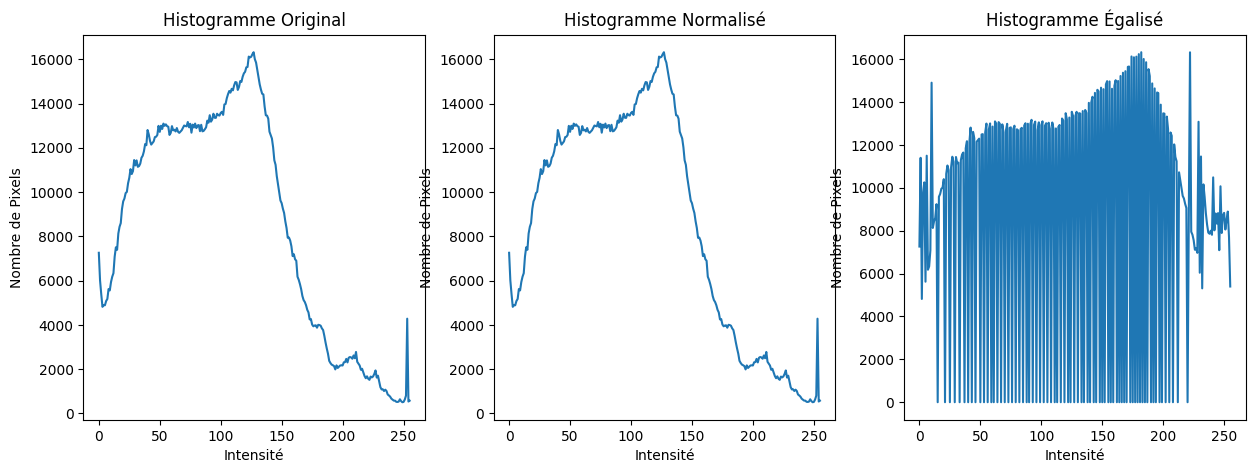

In [11]:
plt.figure(figsize=(15, 5))  

plt.subplot(1, 3, 1)  
plt.plot(hist)
plt.title('Histogramme Original')
plt.xlabel('Intensité')
plt.ylabel('Nombre de Pixels')

plt.subplot(1, 3, 2)  
plt.plot(norm_hist)
plt.title('Histogramme Normalisé')
plt.xlabel('Intensité')
plt.ylabel('Nombre de Pixels')

plt.subplot(1, 3, 3)  
plt.plot(equalized_hist)
plt.title('Histogramme Égalisé')
plt.xlabel('Intensité')
plt.ylabel('Nombre de Pixels')

plt.show()

La normalisation et l'égalisation d'histogramme sont bénéfiques pour améliorer le contraste et la visibilité dans des images sous-exposées ou surexposées, rendant ainsi les détails plus apparents. Cependant, elles peuvent nuire à la qualité de l'image en introduisant du bruit, en dégradant les couleurs, ou en créant des artefacts si l'image initiale est déjà bien équilibrée ou si la distribution des intensités est importante pour l'interprétation (comme dans des images médicales).

# Egalisation adaptative d'histogramme

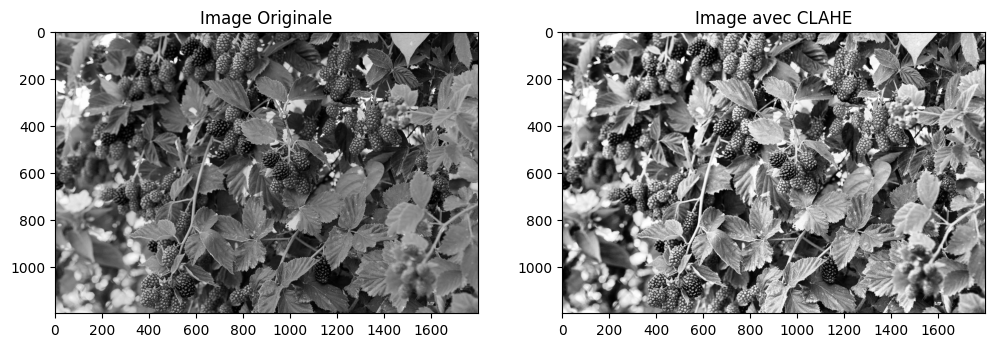

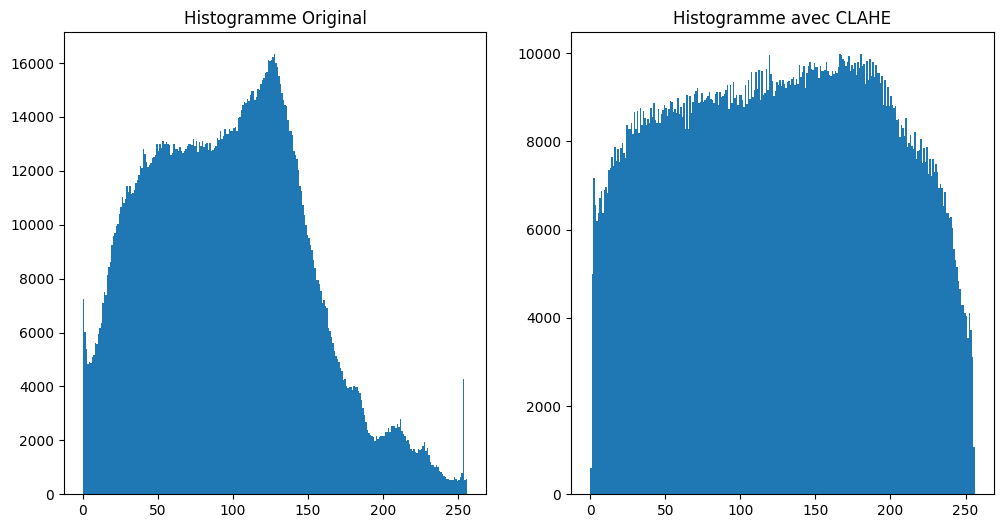

In [13]:
# Créer l'objet CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Appliquer CLAHE
clahe_img = clahe.apply(img)

# Afficher les images originale et traitée
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(img, cmap='gray')
ax1.set_title('Image Originale')
ax2.imshow(clahe_img, cmap='gray')
ax2.set_title('Image avec CLAHE')
plt.show()

# Comparer les histogrammes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(img.ravel(), 256, [0, 256])
ax1.set_title('Histogramme Original')
ax2.hist(clahe_img.ravel(), 256, [0, 256])
ax2.set_title('Histogramme avec CLAHE')
plt.show()

# Analyse de CLAHE

### Comparaison de l'image CLAHE avec l'image normalisée et l'égalisation d'histogramme standard
    1. **CLAHE vs. Image Normalisée** :
    - L'image CLAHE préserve mieux le contraste local, tandis que la normalisation ajuste uniformément les intensités, ce qui peut atténuer des détails importants.

    2. **CLAHE vs. Égalisation d'Histogramme Standard** :
    - L'égalisation standard redistribue les intensités globalement, ce qui peut entraîner des artefacts. CLAHE, en revanche, ajuste le contraste localement, préservant ainsi les détails dans des zones spécifiques.

### Quand utiliser CLAHE plutôt que l'égalisation standard :
    - **Images Texturées** : CLAHE améliore les détails sans introduire d'artefacts.
    - **Éclairage Hétérogène** : CLAHE s'adalpte mieux aux variations d'éclairage dans l'image.
    - **Prévention de la Surexposition** : CLAHE permet un contrôle plus fin, évitant la surexposition et la perte de détails.

# Questions

1. **Différence entre l’histogramme d’une image originale, normalisée et égalisée** :
   - **Image originale** : L'histogramme peut montrer des pics concentrés, indiquant une faible dynamique de contraste.
   - **Image normalisée** : L'histogramme est étalé pour utiliser toute la plage de valeurs d'intensité (0 à 255), mais peut encore avoir des pics à des valeurs spécifiques.
   - **Image égalisée** : L'histogramme est redistribué uniformément sur toute la plage, offrant un meilleur contraste global, mais peut introduire des artefacts.

2. **Applications de la normalisation et de l’égalisation d’histogramme** :
   - **Normalisation** : Améliorer la visibilité des détails dans des images à faible contraste, utile dans l'imagerie médicale ou l'analyse d'images.
   - **Égalisation d'histogramme** : Améliorer le contraste pour des applications de vision par ordinateur, la reconnaissance d'objets, ou dans les images de paysages où le contraste est crucial.

3. **Effet de l’égalisation d’histogramme sur une image très bruitée** :
   - L’égalisation d’histogramme peut amplifier le bruit, car elle redistribue les intensités. Les zones bruyantes peuvent devenir plus prononcées, ce qui dégrade la qualité visuelle de l’image.

4. **Préférence de CLAHE par rapport à l’égalisation d’histogramme standard** :
   - CLAHE est préférable dans des images avec des variations d’éclairage ou des textures fines, car il préserve les détails locaux tout en évitant les artefacts causés par l’égalisation standard.

5. **Avantages et inconvénients de la normalisation des images** :
   - **Avantages** : Amélioration du contraste, utilisation optimale de la dynamique d'intensité, et meilleure visibilité des détails.
   - **Inconvénients** : Peut introduire des distorsions, réduire la qualité si les détails importants sont atténués, et peut également ne pas être efficace si l'image est déjà de bonne qualité.

# Histogramme d'images en couleurs

## Histogrammes pour les composantes RVB

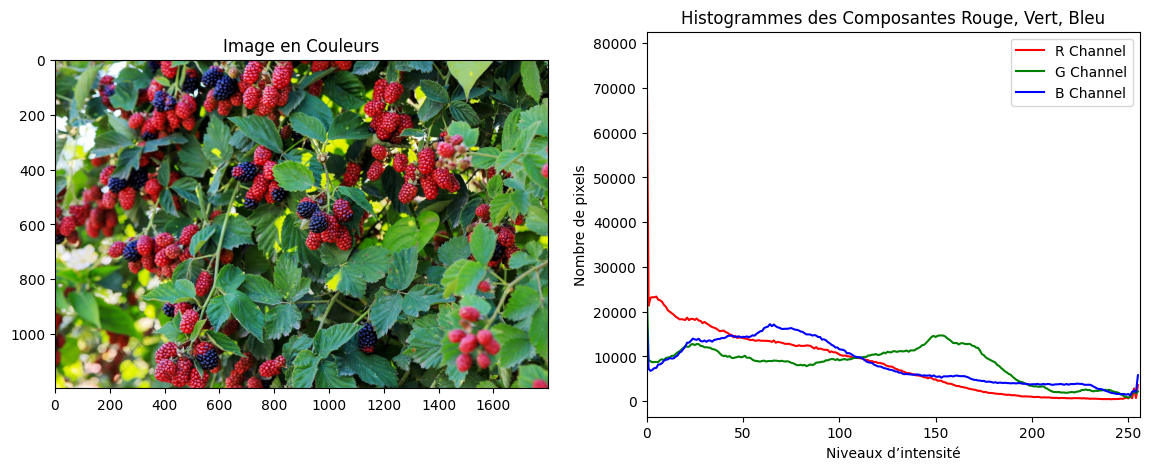

In [18]:
# Charger l’image en couleurs
img_color = cv2.imread(r'C:\Users\Admin\Desktop\School\S5\Computer vision\TP1\raspberry.jpg')

# Convertir de BGR à RGB (OpenCV utilise BGR par défaut)
img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Séparer les composantes Rouge, Vert, Bleu
channels = ['r', 'g', 'b']
colors = ['red', 'green', 'blue']

plt.figure(figsize=(14, 5))

# Affichage de l'image en couleurs
plt.subplot(1, 2, 1)
plt.imshow(img_color_rgb)
plt.title("Image en Couleurs")

# Affichage des histogrammes des composantes Rouge, Vert, Bleu
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_color], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=f'{channels[i].upper()} Channel')  # Ajout de l'étiquette pour chaque canal

plt.xlim([0, 256])
plt.title("Histogrammes des Composantes Rouge, Vert, Bleu")
plt.xlabel('Niveaux d’intensité')
plt.ylabel('Nombre de pixels')
plt.legend()  # Affiche la légende pour les canaux
plt.show()


## Analyse des histogrammes RVB

### 1. Différences entre les histogrammes des trois canaux :
Les histogrammes des trois canaux (rouge, vert, bleu) présentent des différences notables. L’histogramme du canal rouge est plus élevé. Les pics varient également et sont en gros répartis sur les memes environs.

### 2. Informations sur la composition colorimétrique :
L’analyse des histogrammes permet de déduire la composition colorimétrique de l’image. Si un canal a un histogramme plus large et plus élevé, cela indique que cette couleur est plus présente dans l’image. Par exemple, si l’histogramme du rouge montre une large distribution, cela signifie que l'image contient une quantité significative de teintes rouges.

### 3. Dominante de couleur et son reflet dans les histogrammes :
Si l’un des histogrammes est clairement plus élevé que les autres, cela indique une dominante de couleur dans l'image. Par exemple, si l'histogramme rouge a un pic très prononcé comparé aux autres, cela suggère que l'image a une forte composante rouge. De même, si les histogrammes vert et bleu sont beaucoup plus bas, cela renforce l’idée d’une dominance rouge dans l'image.

## Manipulation des composantes RVB

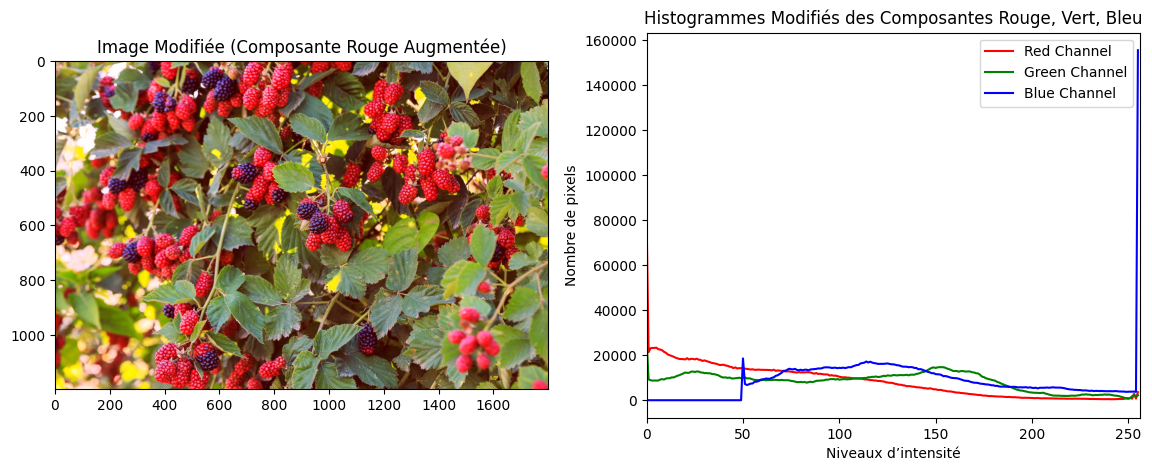

In [19]:
# Augmenter l’intensité de la composante Rouge
img_color_mod = img_color.copy()
img_color_mod[:, :, 2] = cv2.add(img_color_mod[:, :, 2], 50)  # Ajouter 50 au canal Rouge

# Convertir l’image modifiée en RGB pour l’affichage
img_color_mod_rgb = cv2.cvtColor(img_color_mod, cv2.COLOR_BGR2RGB)

# Définir les couleurs pour les histogrammes
colors = ['red', 'green', 'blue']

# Afficher l’image modifiée et les histogrammes mis à jour
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_color_mod_rgb)
plt.title("Image Modifiée (Composante Rouge Augmentée)")

plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_color_mod], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=f'{col.capitalize()} Channel')
plt.xlim([0, 256])
plt.title("Histogrammes Modifiés des Composantes Rouge, Vert, Bleu")
plt.xlabel('Niveaux d’intensité')
plt.ylabel('Nombre de pixels')
plt.legend()  # Ajouter une légende pour les canaux
plt.show()


## Analyse des résultats

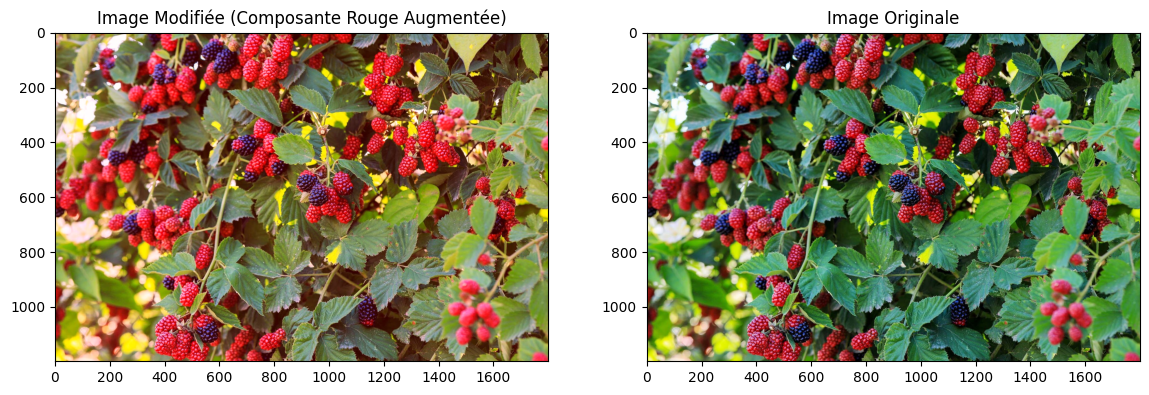

In [21]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_color_mod_rgb)
plt.title("Image Modifiée (Composante Rouge Augmentée)")

plt.subplot(1, 2, 2)
plt.imshow(img_color_rgb)
plt.title("Image Originale")

plt.show()

L'image modifiée est plus 'bright' que l'image originale, elle donne l'impression qu'elle contient plus de jaune. Les couleurs en gros sont plus vives

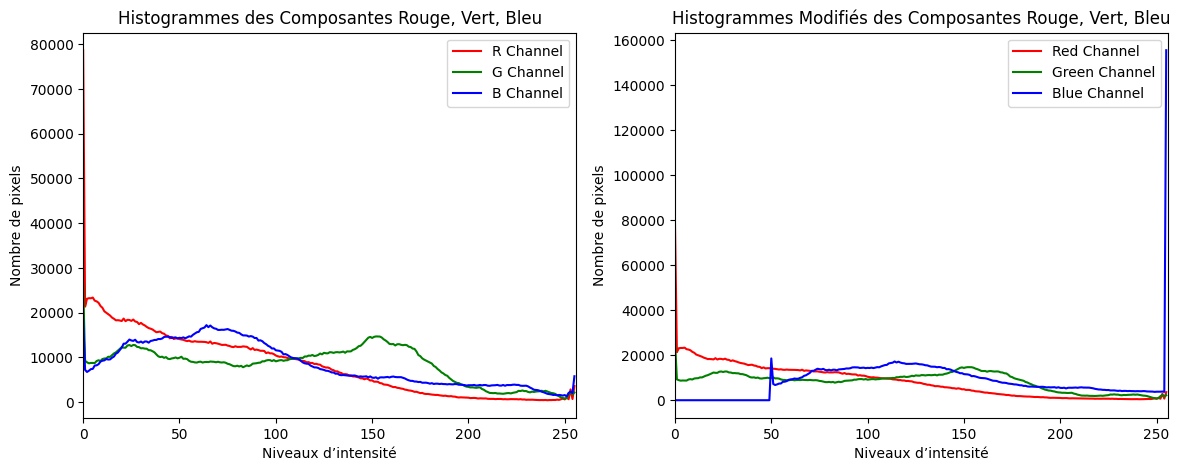

In [23]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_color], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=f'{channels[i].upper()} Channel')  # Ajout de l'étiquette pour chaque canal

plt.xlim([0, 256])
plt.title("Histogrammes des Composantes Rouge, Vert, Bleu")
plt.xlabel('Niveaux d’intensité')
plt.ylabel('Nombre de pixels')
plt.legend()  

plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_color_mod], [i], None, [256], [0, 256])
    plt.plot(hist, color=col, label=f'{col.capitalize()} Channel')
plt.xlim([0, 256])
plt.title("Histogrammes Modifiés des Composantes Rouge, Vert, Bleu")
plt.xlabel('Niveaux d’intensité')
plt.ylabel('Nombre de pixels')
plt.legend() 
plt.show()

L'histogramme de l'image modifiée contient des pics de bleu qui n'étaient pas présentes dans l'histogramme de l'image originale surtout environs une intensité de 255. Les niveaux de rouges et de vert ont étaient égalemnt atténuées. 